In [5]:
from diffusion import ConditionalDiffusion
from modules import UNet_conditional, EMA
from torch import nn, load, FloatTensor
import gradio as gr
import torchvision.transforms as T

05:00:45 - INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
05:00:45 - INFO: NumExpr defaulting to 8 threads.
/mas/u/doorleyr/.pyenv/versions/lu_gen_sim/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import matplotlib.pyplot as plt

In [7]:
MODEL_PATH='models/cond_2023042614_4_500/ckpt.pt'

In [8]:
# DEVICE= "cpu"
DEVICE = "cuda"
NOISE_STEPS=500
IMAGE_SIZE=128
CHANNELS=4
TIME_DIM=256
NCLASSES=5 # ['Comm', 'Open', 'Resi', 'Road', 'Inst']

In [9]:
model = nn.DataParallel(
    UNet_conditional(
        image_size=IMAGE_SIZE, c_in=CHANNELS, 
        c_out= CHANNELS, time_dim=TIME_DIM,
        num_classes=NCLASSES)
    ).to(DEVICE)

In [10]:
diffusion = ConditionalDiffusion(
    noise_steps=NOISE_STEPS, 
    img_size=IMAGE_SIZE, device=DEVICE)

In [11]:
model.load_state_dict(load(MODEL_PATH))

<All keys matched successfully>

In [12]:
def return_images(m1, m2, m3, m4, m5, n=4):
    images = diffusion.sample(model, n=n,
                     labels=FloatTensor([[m1/100, m2/100, m3/100, m4/100, m5/100]]), 
                     channels=CHANNELS)
    transform = T.ToPILImage(mode='RGBA')
    pil_ims=[transform(im) for im in images]
    return pil_ims

In [13]:
pil_im=return_images(0.2, 0.5, 0.7, 0.2, 0.01, 1)
# ['Comm', 'Open', 'Resi', 'Road', 'Inst']
# pil_im[0].save("test_image.png","PNG")

05:01:09 - INFO: Sampling 1 new images....
499it [00:30, 16.42it/s]


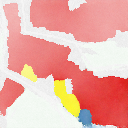

In [20]:
display(pil_im[0])

In [15]:
demo = gr.Interface(
    fn=return_images,
    inputs=[gr.Slider(0, 100,label="Comm Density"),
            gr.Slider(0, 100,label="Open Density"),
            gr.Slider(0, 100,label="Resi Density"),
            gr.Slider(0, 100,label="Road Density"),
           gr.Slider(0, 100,label="Inst Density")],
    outputs="image",
)
demo.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
